In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from config import *
from N_ranking_utils import *
from sklearn.metrics import mean_squared_error

In [11]:
ela=pd.read_csv('new_data/results_transformer_random_ela_predictions/dim_3_samples_50d_PSO1-PSO2-PSO3-PSO4-PSO8-PSO10_budget_10_fold_0_ela_predictions.csv',index_col=0)

In [ ]:
p=pd.read_csv('transformer_results_random_no_constants_new/performance_prediction/PSO1-PSO2-PSO3-PSO4-PSO5-PSO6-PSO7-PSO8-PSO9-PSO10-PSO11-PSO12_random_no_constants_dim_3_samples_50_fold_0_budget_50_n_heads_3_n_layers_1_d_model_20_d_k_10_d_v_10_aggregations_mean/test_transoptys_predictions.csv', index_col=0)
#p.columns=[c.replace("PSO8","PSO5").replace("PSO10","PSO6") for c in p.columns]
true=p[list(filter(lambda x: x.startswith("true_"), p.columns))]
predicted=p[list(filter(lambda x: not x.startswith("true_"), p.columns))]

ela=pd.read_csv('new_data/results_transformer_random_no_constants/dim_3_samples_50d_PSO1-PSO2-PSO3-PSO4-PSO5-PSO6-PSO7-PSO8-PSO9-PSO10-PSO11-PSO12_budget_50_fold_0_ela_predictions.csv',index_col=0)
#ela.columns=[c.replace("PSO8","PSO5").replace("PSO10","PSO6") for c in ela.columns]
p_best=predicted.idxmin(axis=1).apply(lambda x: x.replace("pred_", "")).to_frame()
p_best.columns=['transformer']
p.columns=[c.replace("pred_","transformer_") for c in p.columns]
t_best=true.idxmin(axis=1).apply(lambda x: x.replace("true_", "")).to_frame()
t_best.columns=['true']

e_best=ela.idxmin(axis=1).apply(lambda x: x.replace("ela_", "")).to_frame()
e_best.columns=['ELA']
merged_best=p_best.merge(e_best,left_index=True, right_index=True).merge(t_best,left_index=True, right_index=True)
merged_scores=ela.add_prefix("ELA_").merge(p,left_index=True, right_index=True)
function_count=5
fig,axes=plt.subplots(3,1,figsize=(7,7),sharey=True)
for prefix_id, prefix in enumerate(['ELA', "transformer", "true"]): 
    columns_of_interest=list(filter(lambda c: c.startswith(prefix), merged_scores.columns))
    t=merged_scores[sorted(columns_of_interest)].sample(function_count)
    t.columns=[c[-4:0] for c in t.columns]
    ax=sns.heatmap(t,annot=True, fmt=".2f", cmap='YlGnBu', ax=axes[prefix_id], vmin=0,vmax=1,cbar=False)
    ax.set_title(f'{prefix} predictions')
    ax.set(yticklabels=range(0,function_count))
    


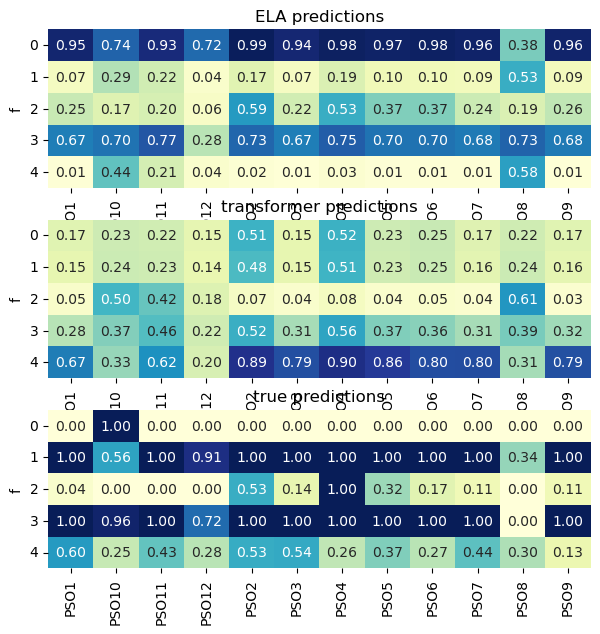

In [9]:
p=pd.read_csv('transformer_results_random_no_constants_new/performance_prediction/PSO1-PSO2-PSO3-PSO4-PSO5-PSO6-PSO7-PSO8-PSO9-PSO10-PSO11-PSO12_random_no_constants_dim_3_samples_50_fold_0_budget_50/test_transoptys_predictions.csv', index_col=0)
#p.columns=[c.replace("PSO8","PSO5").replace("PSO10","PSO6") for c in p.columns]
true=p[list(filter(lambda x: x.startswith("true_"), p.columns))]
predicted=p[list(filter(lambda x: not x.startswith("true_"), p.columns))]

ela=pd.read_csv('new_data/results_transformer_random_no_constants/dim_3_samples_50d_PSO1-PSO2-PSO3-PSO4-PSO5-PSO6-PSO7-PSO8-PSO9-PSO10-PSO11-PSO12_budget_50_fold_0_ela_predictions.csv',index_col=0)
#ela.columns=[c.replace("PSO8","PSO5").replace("PSO10","PSO6") for c in ela.columns]
p_best=predicted.idxmin(axis=1).apply(lambda x: x.replace("pred_", "")).to_frame()
p_best.columns=['transformer']
p.columns=[c.replace("pred_","transformer_") for c in p.columns]
t_best=true.idxmin(axis=1).apply(lambda x: x.replace("true_", "")).to_frame()
t_best.columns=['true']

e_best=ela.idxmin(axis=1).apply(lambda x: x.replace("ela_", "")).to_frame()
e_best.columns=['ELA']
merged_best=p_best.merge(e_best,left_index=True, right_index=True).merge(t_best,left_index=True, right_index=True)
merged_scores=ela.add_prefix("ELA_").merge(p,left_index=True, right_index=True)
function_count=5
fig,axes=plt.subplots(3,1,figsize=(7,7),sharey=True)
for prefix_id, prefix in enumerate(['ELA', "transformer", "true"]): 
    columns_of_interest=list(filter(lambda c: c.startswith(prefix), merged_scores.columns))
    t=merged_scores[sorted(columns_of_interest)].sample(function_count)
    t.columns=[c.split('_')[1] for c in t.columns]
    ax=sns.heatmap(t,annot=True, fmt=".2f", cmap='YlGnBu', ax=axes[prefix_id], vmin=0,vmax=1,cbar=False)
    ax.set_title(f'{prefix} predictions')
    ax.set(yticklabels=range(0,function_count))
    


In [38]:
import os
for dir in os.listdir('transformer_results_random_no_constants_new-Copy1/performance_prediction'):
    new_dir="_".join(dir.split("_")[:12])
    os.rename(f'transformer_results_random_no_constants_new-Copy1/performance_prediction/{dir}',f'transformer_results_random_no_constants_new-Copy1/performance_prediction/{new_dir}')

In [11]:
def calculate_ela_score(dimension, algorithm_portfolio, fold, budget):
    algorithm_performance=pd.read_csv(f'new_data/algorithm_performance/random_no_constants_{dim}d_{algorithm_portfolio}_column_normalized_score.csv', index_col=0)
    ela_predictions=pd.read_csv(f'new_data/results_transformer_random_no_constants/dim_{dim}_samples_50d_{algorithm_portfolio}_budget_{budget}_fold_{fold}_ela_predictions.csv', index_col=0)
    #transopt_predictions=pd.read_csv(f'transformer_results_random_no_constants_new/performance_prediction/{algorithm_portfolio}_random_no_constants_dim_{dim}_samples_50_fold_{fold}_budget_{budget}/test_transoptys_predictions.csv', index_col=0)

    true=algorithm_performance.query('budget==@budget').loc[ela_predictions.index].reset_index().pivot(index='f',columns='algorithm_name',values='algorithm_rank')
    
    misranking_score=calculate_misrankings_score(true, ela_predictions)
    loss=calculate_loss(true, ela_predictions)
    return misranking_score, mean_squared_error(true, ela_predictions), loss, fold,budget

In [16]:
def calculate_all_ela_scores(dimension,algorithm_portfolio):
    all_scores=[calculate_ela_score(dimension, algorithm_portfolio, fold, budget) for fold in range(0,10) for budget in [10,30,50]]
    all_scores=pd.DataFrame(all_scores, columns= ['PRE', 'MSE','Loss', 'fold', 'budget'])
    return all_scores

In [18]:
all_scores=[]
for dim in [3,10]:
    for algorithm_portfolio in [ 'DE-GA-ES-PSO','PSO1-PSO2-PSO3-PSO4-PSO5-PSO6-PSO7-PSO8-PSO9-PSO10-PSO11-PSO12']:
        print(dim, algorithm_portfolio )
        df=pd.concat([pd.read_csv(f'new_data/results_transformer_random_no_constants/dim_{dim}_samples_50d_{algorithm_portfolio}_budget_{budget}.csv', index_col=0) for budget in [10,30,50]])
        df=df.query('test_benchmark=="test" and model!="ELA"')[['budget','model','value','score','fold']]
        df['score']=df['score'].apply(lambda x: x if x!='Misrankings score' else 'PRE')

        ela_preds=calculate_all_ela_scores(dim, algorithm_portfolio)
        ela_preds=ela_preds.melt(id_vars=['fold','budget'], value_vars=['PRE','MSE','Loss'], var_name='score').assign(model='ELA')[['budget','model','value','score','fold']]
        print(ela_preds.shape)
        df=pd.concat([df,ela_preds])
        all_scores+=[df.assign(dimension=dim, algorithm_portfolio=algorithm_portfolio if algorithm_portfolio=="DE-GA-ES-PSO" else "PSO configurations")]
all_scores=pd.concat(all_scores)


3 DE-GA-ES-PSO
(90, 5)
3 PSO1-PSO2-PSO3-PSO4-PSO5-PSO6-PSO7-PSO8-PSO9-PSO10-PSO11-PSO12
(90, 5)
10 DE-GA-ES-PSO
(90, 5)
10 PSO1-PSO2-PSO3-PSO4-PSO5-PSO6-PSO7-PSO8-PSO9-PSO10-PSO11-PSO12
(90, 5)


In [51]:
scores_minus_dummy=[]
t=all_scores.set_index(['algorithm_portfolio','dimension','fold','score','model','budget'])
for algorithm_portfolio in ['DE-GA-ES-PSO','PSO configurations']:
    for dimension in [3,10]:
        for fold in range(0,10):
            for model in ['transformer','ELA']:
                for budget in [10,30,50]:
                    s=t.loc[algorithm_portfolio, dimension, fold, 'Loss', model, budget] - t.loc[algorithm_portfolio, dimension, fold, 'Loss', 'dummy', budget]
                    scores_minus_dummy+= [(algorithm_portfolio, dimension, fold, 'Loss', model, budget,float(s))]

/tmp/ipykernel_12982/3669955515.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  scores_minus_dummy+= [(algorithm_portfolio, dimension, fold, 'Loss', model, budget,float(s))]


In [52]:
r=pd.DataFrame(scores_minus_dummy, columns=['algorithm_portfolio','dimension','fold','score','model','budget','value'])

In [56]:
r.query('score=="Loss" and model=="transformer"').groupby(['algorithm_portfolio','dimension'])['value'].std()

algorithm_portfolio  dimension
DE-GA-ES-PSO         3            0.040207
                     10           0.005840
PSO configurations   3            0.036467
                     10           0.075814
Name: value, dtype: float64

In [59]:
r.query('score=="Loss"').groupby(['algorithm_portfolio','dimension','model'])['value'].max()

algorithm_portfolio  dimension  model      
DE-GA-ES-PSO         3          ELA            0.187714
                                transformer    0.138590
                     10         ELA            0.021043
                                transformer    0.003061
PSO configurations   3          ELA            0.129825
                                transformer    0.108938
                     10         ELA            0.246611
                                transformer    0.182618
Name: value, dtype: float64

In [37]:
all_scores.query('score=="Loss"').groupby(['dimension','model'])['value'].median()

dimension  model      
3          ELA            0.916758
           dummy          0.834051
           transformer    0.887595
10         ELA            0.936667
           dummy          0.850059
           transformer    0.908902
Name: value, dtype: float64

<Figure size 500x500 with 0 Axes>

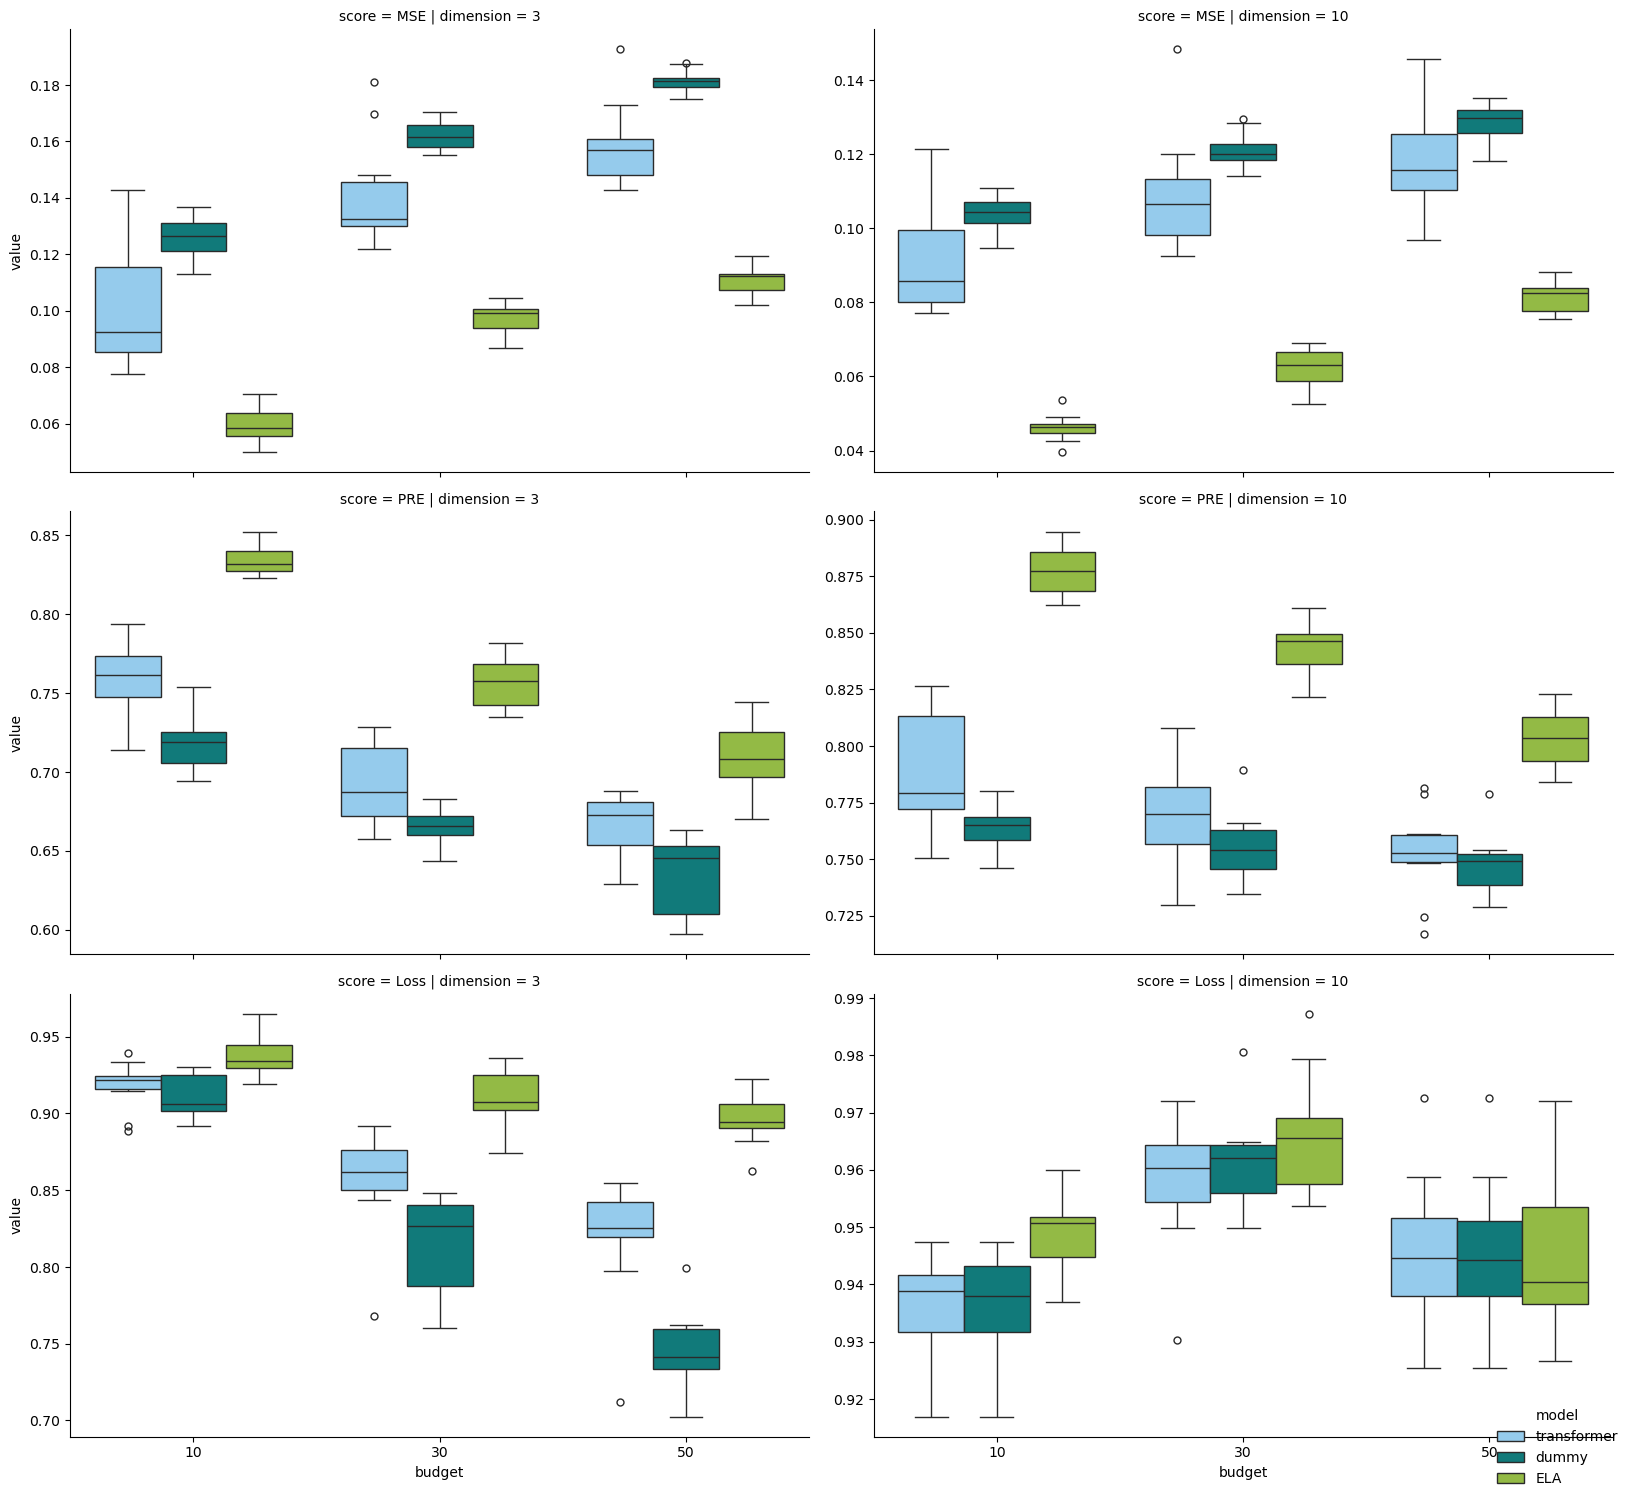

In [19]:
plt.figure(figsize=(5,5))
ax=sns.catplot(all_scores.query('algorithm_portfolio=="DE-GA-ES-PSO"').reset_index(), x='budget', y='value', hue='model', palette=color_palette[:3], row='score',col='dimension', kind='box',aspect=1.5, sharey=False)
#ax.set_ylabel('loss')
sns.move_legend(ax, "lower right")

plt.tight_layout()
plt.savefig(f'figures/transformer_results_samples_50.pdf')
plt.show()

<Figure size 500x500 with 0 Axes>

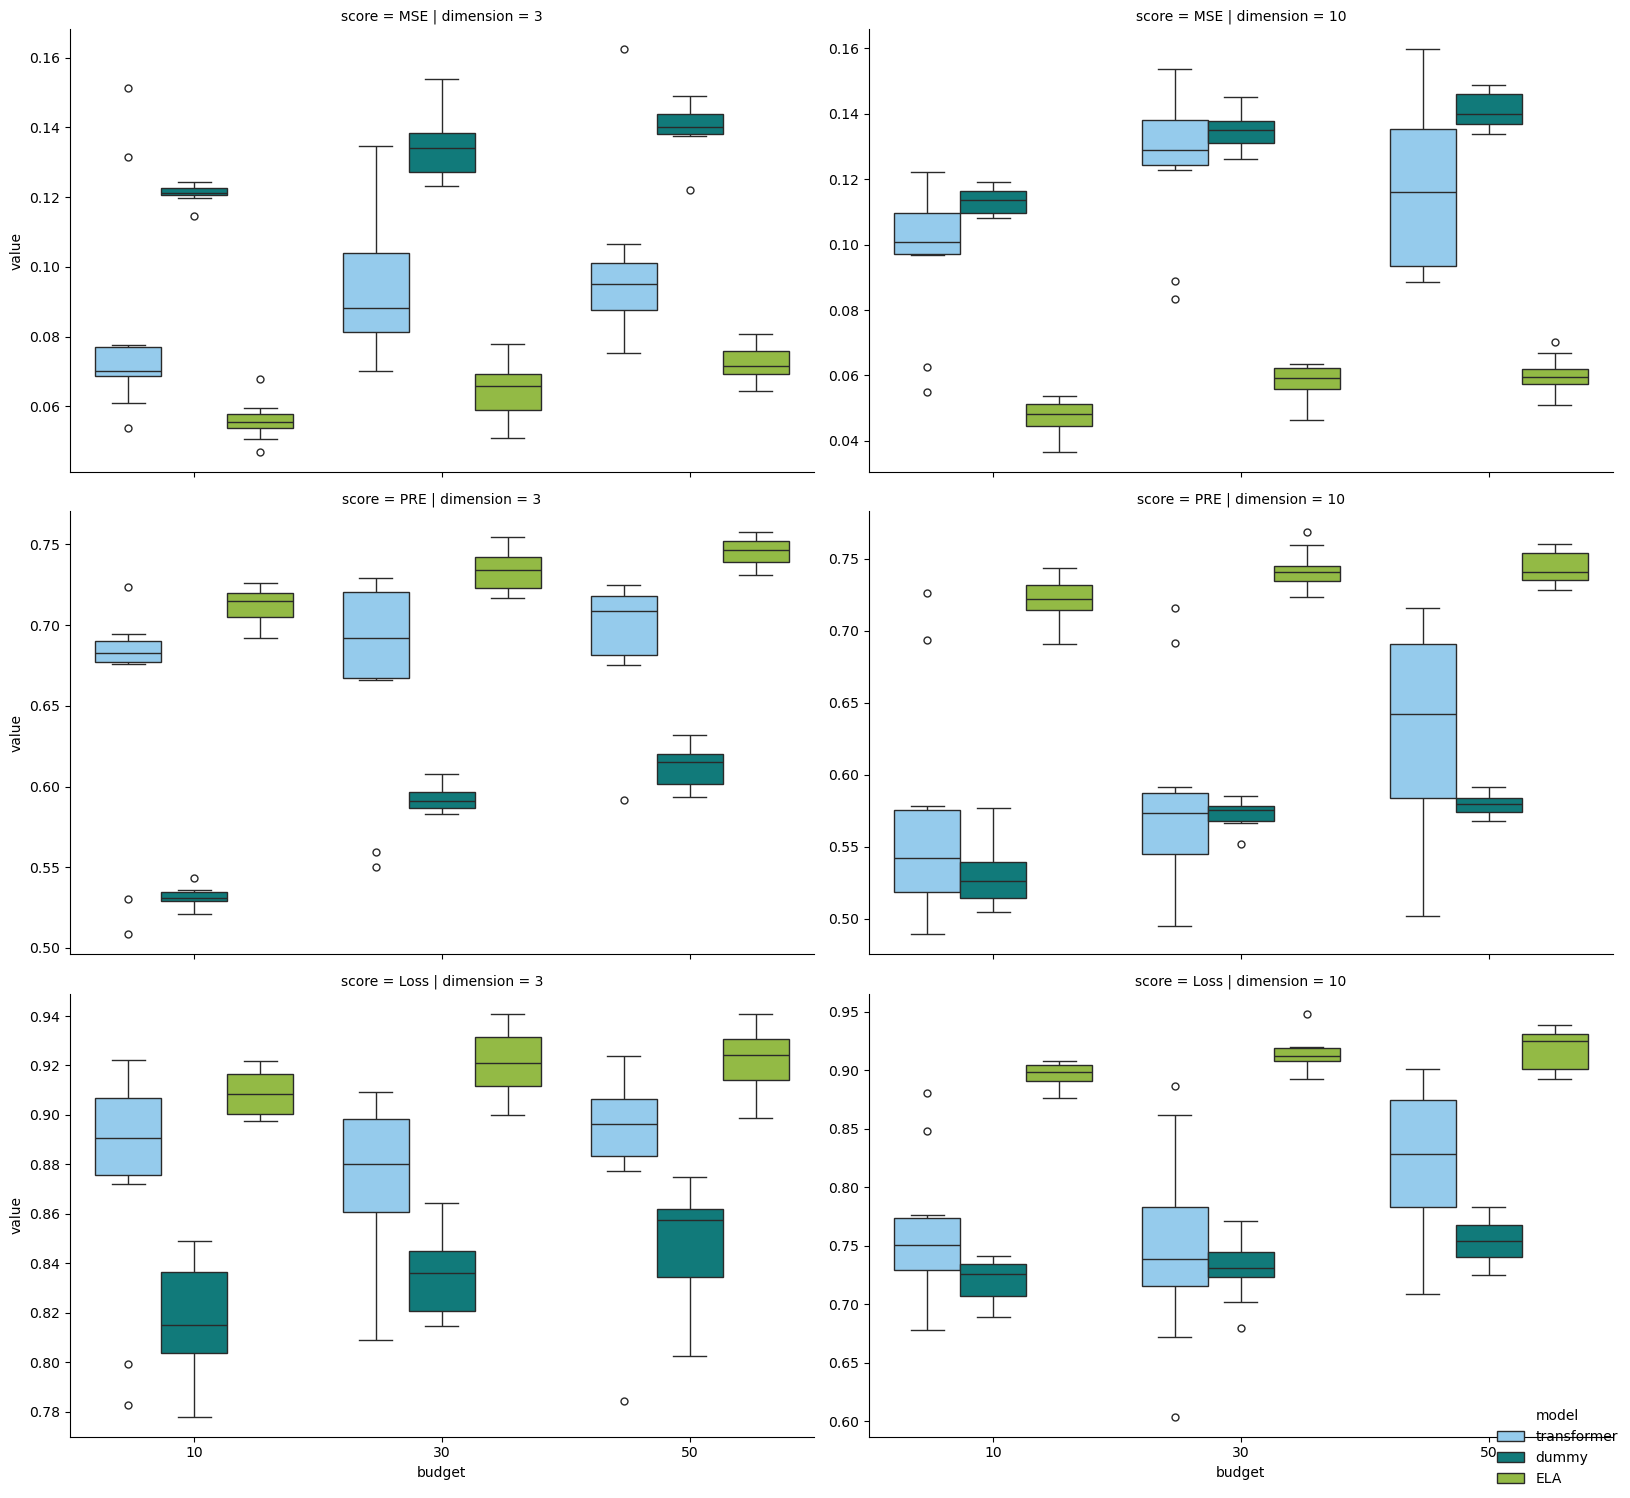

In [20]:
plt.figure(figsize=(5,5))
ax=sns.catplot(all_scores.query('algorithm_portfolio=="PSO configurations"').reset_index(), x='budget', y='value', hue='model', palette=color_palette[:3], row='score',col='dimension', kind='box',aspect=1.5, sharey=False)
#ax.set_ylabel('loss')
sns.move_legend(ax, "lower right")

plt.tight_layout()
plt.savefig(f'figures/transformer_results_samples_50.pdf')
plt.show()

3 DE-GA-ES-PSO
(60, 5)


<Figure size 500x300 with 0 Axes>

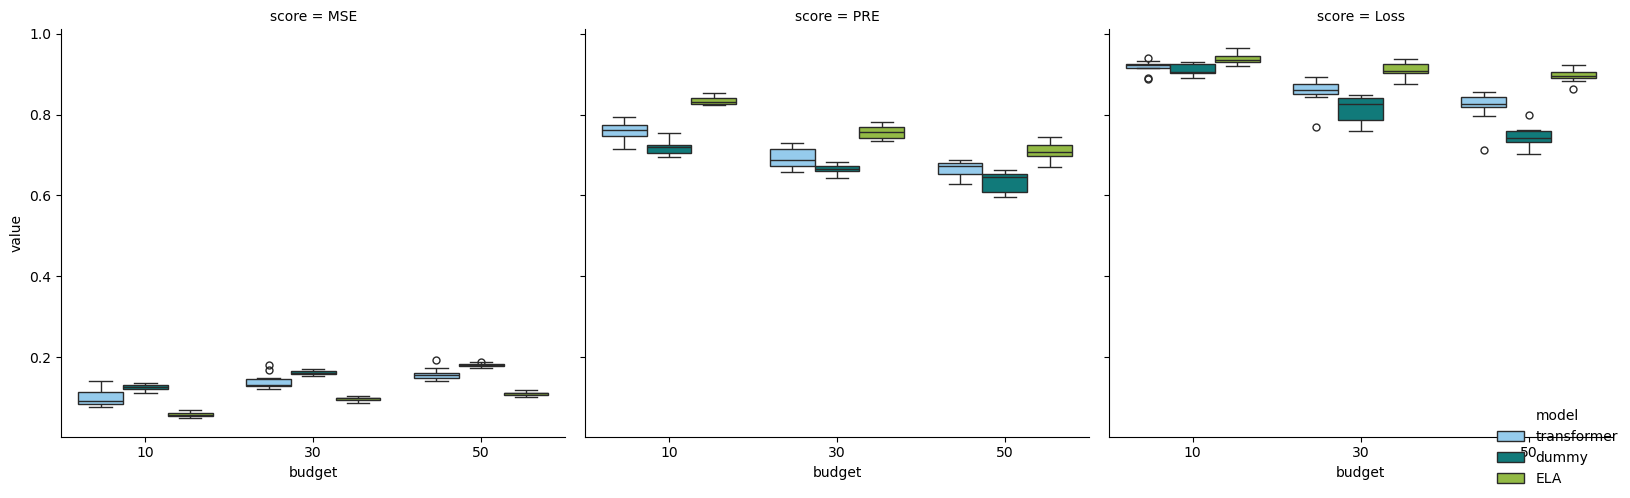

3 PSO1-PSO2-PSO3-PSO4-PSO5-PSO6-PSO7-PSO8-PSO9-PSO10-PSO11-PSO12
(60, 5)


<Figure size 500x300 with 0 Axes>

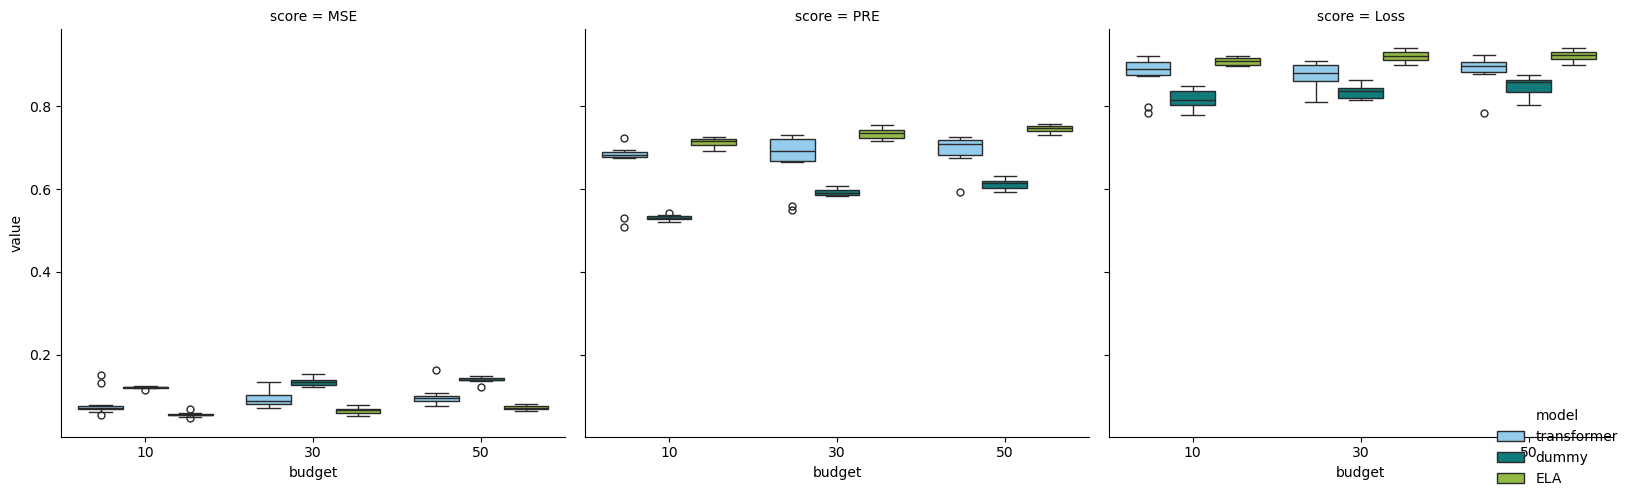

10 DE-GA-ES-PSO
(60, 5)


<Figure size 500x300 with 0 Axes>

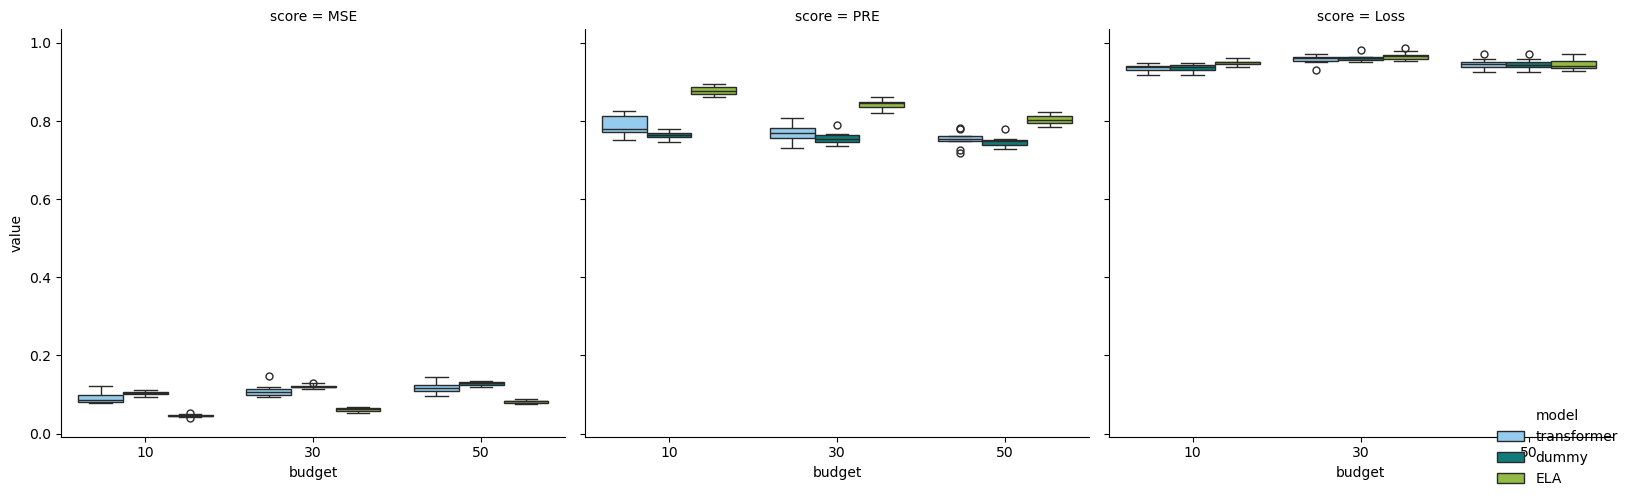

10 PSO1-PSO2-PSO3-PSO4-PSO5-PSO6-PSO7-PSO8-PSO9-PSO10-PSO11-PSO12
(60, 5)


<Figure size 500x300 with 0 Axes>

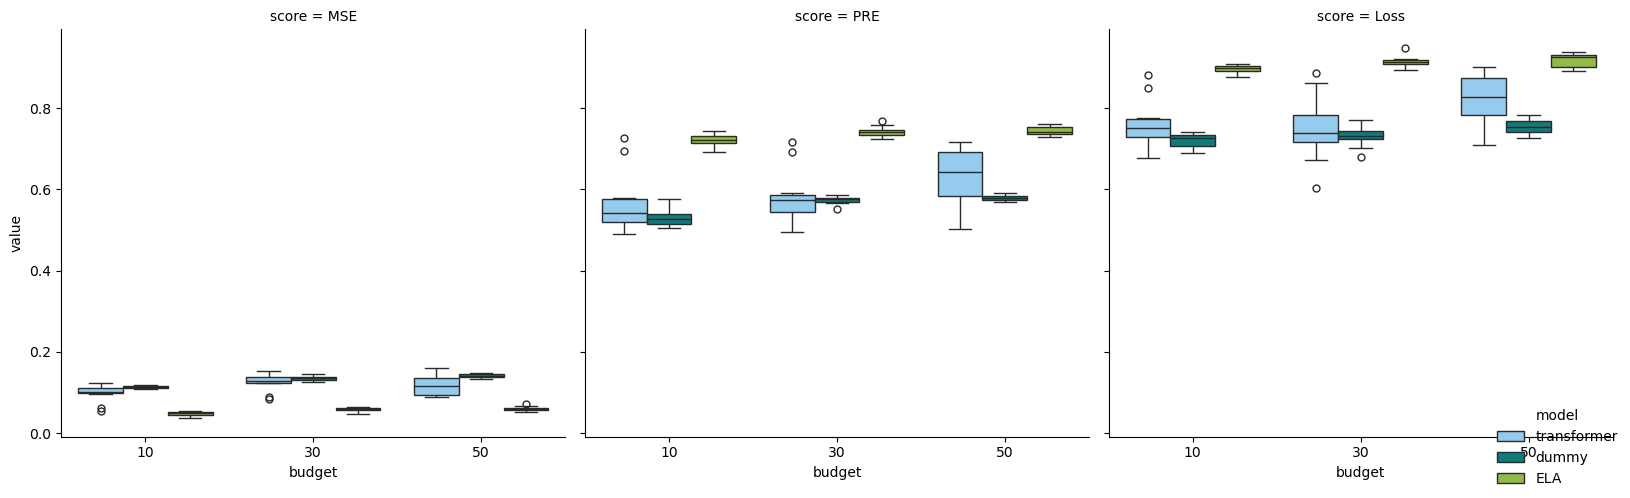

In [91]:
for dim in [3,10]:
    for algorithm_portfolio in [ 'DE-GA-ES-PSO','PSO1-PSO2-PSO3-PSO4-PSO5-PSO6-PSO7-PSO8-PSO9-PSO10-PSO11-PSO12']:
        print(dim, algorithm_portfolio )
        df=pd.concat([pd.read_csv(f'new_data/results_transformer_random_no_constants/dim_{dim}_samples_50d_{algorithm_portfolio}_budget_{budget}.csv', index_col=0) for budget in [10,30,50]])
        df=df.query('test_benchmark=="test"')[['budget','model','value','score','fold']]
        df['score']=df['score'].apply(lambda x: x if x!='Misrankings score' else 'PRE')

        ela_preds=calculate_all_ela_scores(dim, algorithm_portfolio)
        ela_preds=ela_preds.melt(id_vars=['fold','budget'], value_vars=['PRE','MSE'], var_name='score').assign(model='ELA')[['budget','model','value','score','fold']]
        print(ela_preds.shape)
        df=pd.concat([df,ela_preds])

        plt.figure(figsize=(5,3))
        ax=sns.catplot(df, x='budget', y='value', hue='model', palette=color_palette[:3], col='score',kind='box')
        #ax.set_ylabel('loss')
        sns.move_legend(ax, "lower right")
        
        plt.tight_layout()
        plt.savefig(f'figures/transformer_results_{algorithm_portfolio}_dim_{dim}_samples_50.pdf')
        plt.show()


In [68]:
df=pd.read_csv('transformer_results_random/performance_prediction/DE-GA-ES-PSO_random_dim_10_samples_50_fold_0_budget_50_n_heads_3_n_layers_1_d_model_20_d_k_10_d_v_10_aggregations_mean/test_transoptys_predictions.csv',index_col=0)

In [78]:
from sklearn.metrics import mean_squared_error
import os

In [80]:
all_results=os.listdir('transformer_results_random/performance_prediction')

In [87]:
for algorithm_portfolio in [ 'DE-GA-ES-PSO','PSO1-PSO2-PSO3-PSO4-PSO8-PSO10']:
    for dim in [3,10]:
        for sample in [50]:
            files_of_interest= list(filter(lambda x: x.startswith(f'{algorithm_portfolio}_random_dim_{dim}_samples_{sample}'),all_results ))
            print(len(files_of_interest))
            df=pd.concat([pd.read_csv(os.path.join('transformer_results_random/performance_prediction',f,'test_transoptys_predictions.csv'),index_col=0) for f in files_of_interest])
            for alg in algorithm_portfolio.split('-'):
                print(alg)
                m=mean_squared_error(df[f"true_{alg.split('_')[0]}"],df[f"pred_{alg.split('_')[0]}"])
                print(m)

30
DE
0.10283517390579122
GA
0.08878715895885013
ES
0.14944107706775744
PSO
0.13767465052817254
30
DE
0.10246397011067275
GA
0.04406731142054342
ES
0.1173118788390929
PSO
0.1328577275861433
30
PSO1
0.06893238070402972
PSO2
0.08602101336183486
PSO3
0.06624772544810344
PSO4
0.09212887847448127
PSO8
0.10843309935184597
PSO10
0.10445940220751827
30
PSO1
0.09887851879216805
PSO2
0.10324239477280765
PSO3
0.1061081534446425
PSO4
0.10950589825160208
PSO8
0.11690280386388208
PSO10
0.11942460308269397


In [19]:
from sklearn.preprocessing import MinMaxScaler

   test_benchmark        model score      loss      train_benchmark  fold  \
20           test  transformer  Loss  0.876060  random_no_constants     0   
20           test  transformer  Loss  0.891623  random_no_constants     1   
20           test  transformer  Loss  0.868465  random_no_constants     2   
20           test  transformer  Loss  0.852924  random_no_constants     3   
20           test  transformer  Loss  0.889453  random_no_constants     4   
20           test  transformer  Loss  0.843798  random_no_constants     5   
20           test  transformer  Loss  0.849045  random_no_constants     6   
20           test  transformer  Loss  0.854742  random_no_constants     7   
20           test  transformer  Loss  0.876135  random_no_constants     8   
20           test  transformer  Loss  0.768061  random_no_constants     9   

    sample_count_dimension_factor  budget  d_model  d_k  d_v  fc_size  \
20                             50      30       70   30   10       40   
20    

/tmp/ipykernel_12982/3831107147.py:18: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  ax=sns.lineplot(df.query('fold<5'), x='variable', y='value', palette=sns.hls_palette(5), hue='fold', style='fold',markers=['o'],dashes=False)


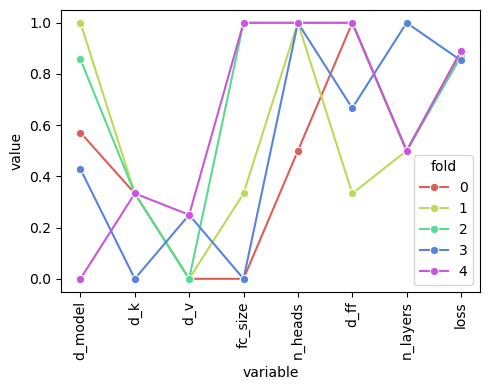

   test_benchmark        model score      loss      train_benchmark  fold  \
20           test  transformer  Loss  0.909186  random_no_constants     0   
20           test  transformer  Loss  0.808966  random_no_constants     1   
20           test  transformer  Loss  0.906539  random_no_constants     2   
20           test  transformer  Loss  0.895129  random_no_constants     3   
20           test  transformer  Loss  0.860060  random_no_constants     4   
20           test  transformer  Loss  0.862865  random_no_constants     5   
20           test  transformer  Loss  0.865612  random_no_constants     6   
20           test  transformer  Loss  0.895042  random_no_constants     7   
20           test  transformer  Loss  0.855615  random_no_constants     8   
20           test  transformer  Loss  0.899488  random_no_constants     9   

    sample_count_dimension_factor  budget  d_model  d_k  d_v  fc_size  \
20                             50      30      100   50   20       40   
20    

/tmp/ipykernel_12982/3831107147.py:18: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  ax=sns.lineplot(df.query('fold<5'), x='variable', y='value', palette=sns.hls_palette(5), hue='fold', style='fold',markers=['o'],dashes=False)


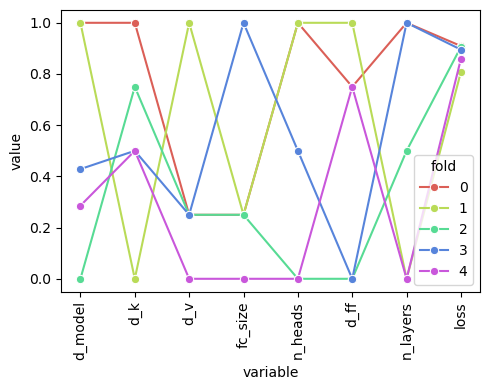

   test_benchmark        model score      loss      train_benchmark  fold  \
20           test  transformer  Loss  0.971966  random_no_constants     0   
20           test  transformer  Loss  0.957563  random_no_constants     1   
20           test  transformer  Loss  0.949843  random_no_constants     2   
20           test  transformer  Loss  0.963798  random_no_constants     3   
20           test  transformer  Loss  0.963225  random_no_constants     4   
20           test  transformer  Loss  0.954008  random_no_constants     5   
20           test  transformer  Loss  0.964951  random_no_constants     6   
20           test  transformer  Loss  0.964411  random_no_constants     7   
20           test  transformer  Loss  0.930276  random_no_constants     8   
20           test  transformer  Loss  0.955320  random_no_constants     9   

    sample_count_dimension_factor  budget  d_model  d_k  d_v  fc_size  \
20                             50      30       70   50   30      100   
20    

/tmp/ipykernel_12982/3831107147.py:18: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  ax=sns.lineplot(df.query('fold<5'), x='variable', y='value', palette=sns.hls_palette(5), hue='fold', style='fold',markers=['o'],dashes=False)


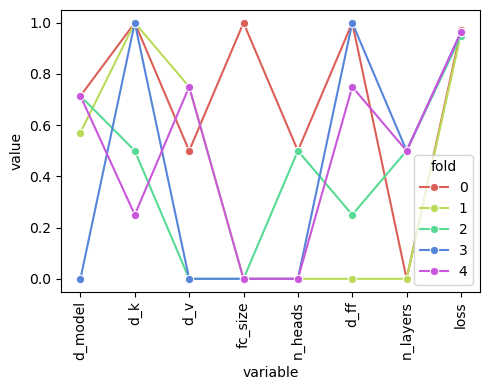

   test_benchmark        model score      loss      train_benchmark  fold  \
20           test  transformer  Loss  0.671878  random_no_constants     0   
20           test  transformer  Loss  0.731809  random_no_constants     1   
20           test  transformer  Loss  0.758759  random_no_constants     2   
20           test  transformer  Loss  0.791390  random_no_constants     3   
20           test  transformer  Loss  0.720056  random_no_constants     4   
20           test  transformer  Loss  0.862117  random_no_constants     5   
20           test  transformer  Loss  0.745981  random_no_constants     6   
20           test  transformer  Loss  0.603939  random_no_constants     7   
20           test  transformer  Loss  0.886434  random_no_constants     8   
20           test  transformer  Loss  0.714233  random_no_constants     9   

    sample_count_dimension_factor  budget  d_model  d_k  d_v  fc_size  \
20                             50      30       70   50   50       40   
20    

/tmp/ipykernel_12982/3831107147.py:18: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  ax=sns.lineplot(df.query('fold<5'), x='variable', y='value', palette=sns.hls_palette(5), hue='fold', style='fold',markers=['o'],dashes=False)


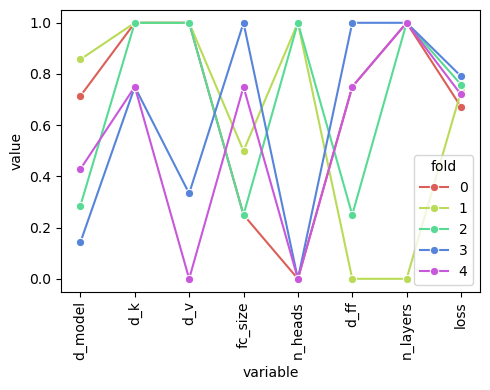

In [21]:
budget=30
for dim in [3,10]:
    for algorithm_portfolio in [ 'DE-GA-ES-PSO','PSO1-PSO2-PSO3-PSO4-PSO5-PSO6-PSO7-PSO8-PSO9-PSO10-PSO11-PSO12']:

        df=pd.concat([pd.read_csv(f'new_data/results_transformer_random_no_constants/dim_{dim}_samples_50d_{algorithm_portfolio}_budget_{budget}.csv', index_col=0) for budget in [10,30,50]])
        df=df.query('budget==@budget and test_benchmark=="test" and model=="transformer" and score=="Loss" and train_benchmark=="random_no_constants"').rename(columns={'value':'loss'})
        print(df)
        value_vars=['d_model','d_k','d_v','fc_size', 'n_heads', 'd_ff',  'n_layers','loss']
        for v in value_vars:
            if v=='loss':
                continue
            df[v]=MinMaxScaler().fit_transform(df[v].values.reshape(-1, 1))
        df=df.melt(id_vars=['fold','budget'], value_vars= value_vars)
        print(df)
        df['fold']=df['fold'].apply(lambda x: int(x))
        plt.figure(figsize=(5,4))
        
        ax=sns.lineplot(df.query('fold<5'), x='variable', y='value', palette=sns.hls_palette(5), hue='fold', style='fold',markers=['o'],dashes=False)
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.savefig(f'figures/chosen_hyperparameters_{algorithm_portfolio}_dim_{dim}.pdf')
        plt.show()
        #sns.catplot(df, col='variable', y='value')



Empty DataFrame
Columns: [fold, budget, variable, value]
Index: []


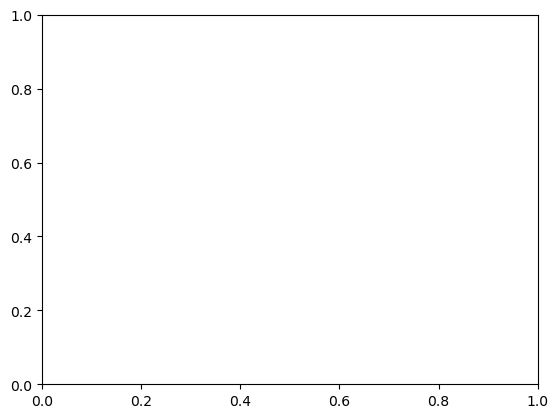

Empty DataFrame
Columns: [fold, budget, variable, value]
Index: []


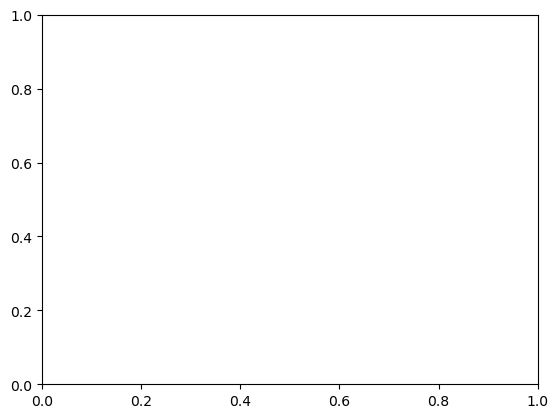

Empty DataFrame
Columns: [fold, budget, variable, value]
Index: []


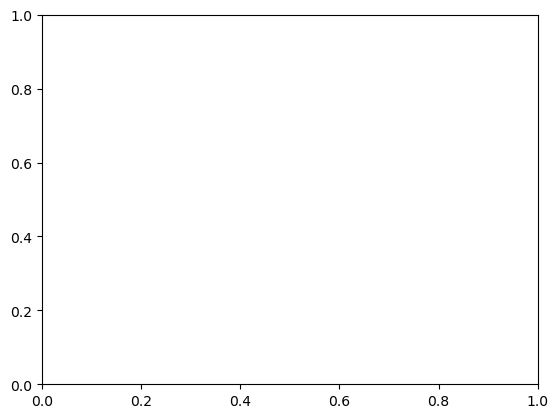

Empty DataFrame
Columns: [fold, budget, variable, value]
Index: []


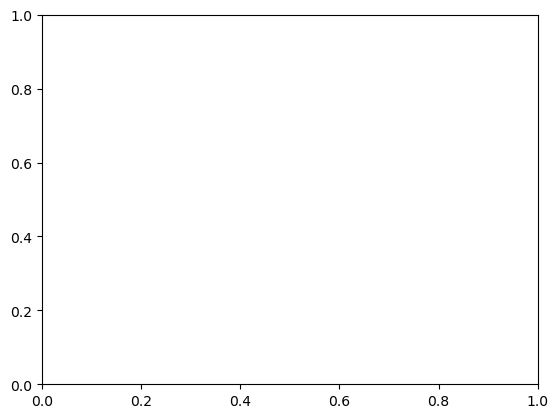

In [17]:
for dim in [3,10]:
    for algorithm_portfolio in [ 'DE-GA-ES-PSO','PSO1-PSO2-PSO3-PSO4-PSO8-PSO10']:

        df=pd.concat([pd.read_csv(f'new_data/results_transformer_random_no_constants/dim_{dim}_samples_50d_{algorithm_portfolio}_budget_{budget}.csv', index_col=0) for budget in [10,30,50]])
        df=df.query('budget==@budget and test_benchmark=="test" and model=="transformer" and score=="MSE" and train_benchmark=="random"').drop(columns=['value'])
        value_vars=['d_model','d_k','d_v','fc_size', 'n_heads', 'd_ff',  'n_layers']
        '''for v in value_vars:
            df[v]=MinMaxScaler().fit_transform(df[v].values.reshape(-1, 1))'''
        df=df.melt(id_vars=['fold','budget'], value_vars= value_vars)
        print(df)
        df['fold']=df['fold'].apply(lambda x: int(x))
        plt.figure()
        
        sns.boxplot(df, x='variable', y='value', palette=sns.hls_palette(10))
        plt.show()
        #sns.catplot(df, col='variable', y='value')

